In [1]:
import TopoSPAM as TopoSPAM
import TopoSPAM.mesh_methods as mm
%matplotlib inline
TopoSPAM.set_repo_path('/Users/krishna/PhD/TopoSPAM')

Success: The path '/Users/krishna/PhD/TopoSPAM' contains the TopoSPAM repository.


## Poisson Disk Sampling

In [2]:
dim = (15,15)
r_poiss = 1.55
#this function makes two(or more) surfaces where vertices are sampled using the poisson disk sampling method
#the surfaces are not identical to each other
balls_df, springs_df = mm.poisson_mesh(dim, r = r_poiss, layers = 2, thickness = 1, k = 1, ns = 1, mass=1, shape='square', border_bool=True, alpha=180)



In [3]:
# save to vtk
mm.dfToVtk(balls_df, springs_df, filename="trianglemesh.vtk", add_polygons=False)

## Uniform Triangular Mesh

In [4]:
balls_df, springs_df = mm.init_trianglemesh(nrow=15, ncol = 15, thickness=1, thin = False)

In [5]:
mm.dfToVtk(balls_df, springs_df, filename="trianglemesh.vtk", add_polygons=False)

## Making mesh from a point cloud

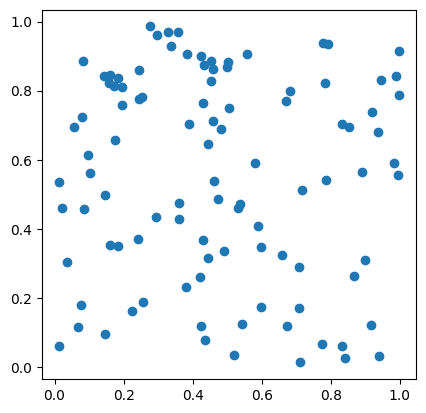

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

balls_df = pd.DataFrame(columns = ["x", "y", "z"])
balls_df["x"] = np.random.rand(100)
balls_df["y"] = np.random.rand(100)
balls_df["z"] = 0#np.random.rand(100)
balls_df["stack"] = 0

#plot the cloud of points
fig = plt.figure()
ax = fig.add_subplot(111,)  # projection='3d'
ax.scatter(balls_df["x"], balls_df["y"],)
ax.set_aspect('equal')
plt.show()

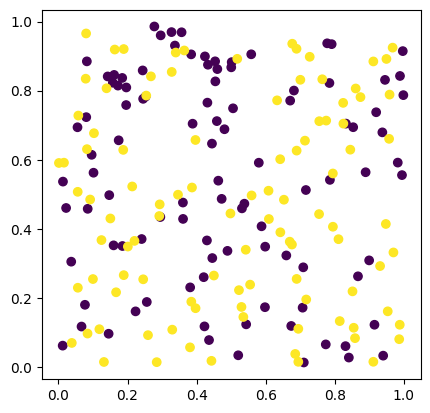

In [7]:
#add second layer
balls_df_lower = pd.DataFrame(columns=["x", "y", "z"])
balls_df_lower["x"] = np.random.rand(100)
balls_df_lower["y"] = np.random.rand(100)
balls_df_lower["z"] = 0.1  # np.random.rand(100)
balls_df_lower["stack"] = 1

balls_df = pd.concat([balls_df, balls_df_lower]).reset_index(drop=True)

# plot the cloud of points
fig = plt.figure()
ax = fig.add_subplot(111,)  # projection='3d'
ax.scatter(balls_df["x"], balls_df["y"], c=balls_df["stack"])
ax.set_aspect('equal')
plt.show()

In [8]:
#triangulate the cloud of points
balls, springs = mm.df_from_pointcloud(balls_df)

In [ ]:
mm.dfToVtk(balls, springs, filename="trianglemesh.vtk", add_polygons=False)